Importing all the necessary headfiles and libraries.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import gradio as gr
import os
import csv
from gradio import FlaggingCallback

Making the Logistic Regression Classifier for training  and testing.

1. load digit data

In [5]:
digits = load_digits()
X, y = digits.data, digits.target
print("Dataset Loaded")
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

Dataset Loaded
Shape of X: (1797, 64), Shape of y: (1797,)


2. Creating target column

In [6]:
df = pd.DataFrame(X)
df['label'] = y
print("First 5 entries of the dataset:")
print(df.head())

First 5 entries of the dataset:
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  label  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]


3. Checking target incidence


Class Distribution:
label
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


<ipython-input-7-00553e4b345b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="Set2")


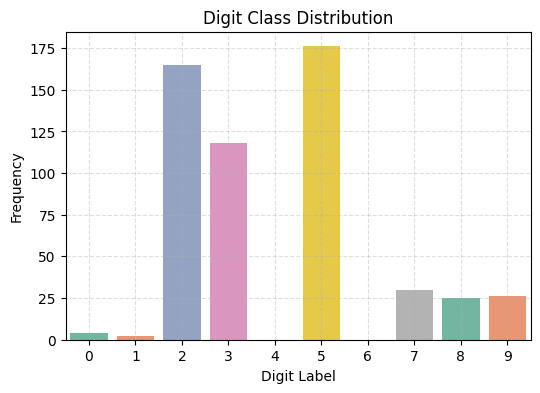

In [7]:
print("\nClass Distribution:")
print(df['label'].value_counts().sort_index())

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette="Set2")
plt.title("Digit Class Distribution")
plt.xlabel("Digit Label")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

4. Spliting the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (1437, 64), Test Set: (360, 64)


5. Normalization


Normalized training sample (first row):
[[0.     0.     0.1875 0.875  0.0625 0.     0.     0.    ]
 [0.     0.     0.75   0.75   0.     0.     0.     0.    ]
 [0.     0.1875 1.     0.375  0.     0.     0.     0.    ]
 [0.     0.3125 1.     0.125  0.     0.     0.     0.    ]
 [0.     0.375  1.     0.125  0.3125 0.125  0.     0.    ]
 [0.     0.25   1.     0.125  0.75   0.9375 0.125  0.    ]
 [0.     0.0625 0.875  0.8125 0.125  0.8125 0.6875 0.    ]
 [0.     0.     0.1875 0.6875 1.     0.8125 0.25   0.    ]]


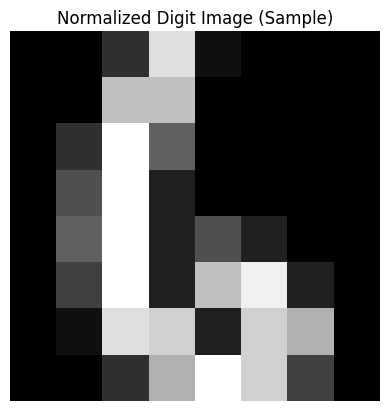

In [9]:
X_train_scaled = (X_train / 16.0)
X_test_scaled = (X_test / 16.0)
print("\nNormalized training sample (first row):")
print(X_train_scaled[0].reshape(8, 8))

plt.imshow(X_train_scaled[0].reshape(8, 8), cmap="gray")
plt.title("Normalized Digit Image (Sample)")
plt.axis("off")
plt.show()

6. Training the model

In [10]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)
print("\nModel Training Complete.")


Model Training Complete.


7. Accuracy

In [11]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Set: {accuracy * 100:.2f}%")


Model Accuracy on Test Set: 96.67%


Visualization Section

1. Sample Digits

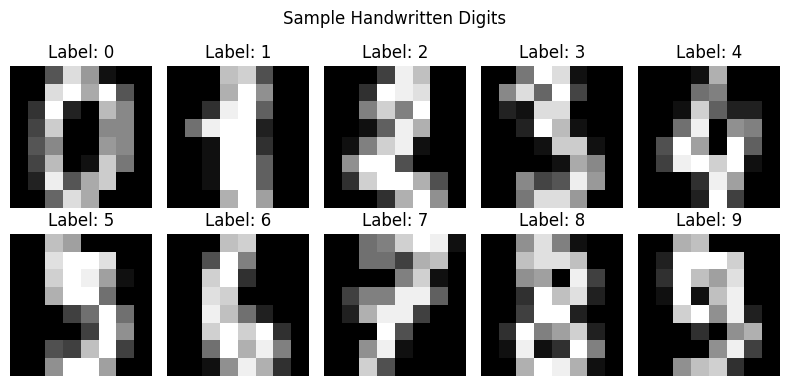

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.suptitle("Sample Handwritten Digits")
plt.tight_layout()
plt.show()

2. Label distribution

<ipython-input-14-0132295237a3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="Set2")


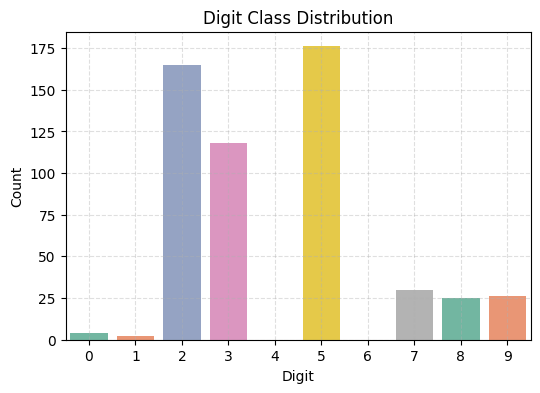

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette="Set2")
plt.title("Digit Class Distribution")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

3. Correlation Heatmap

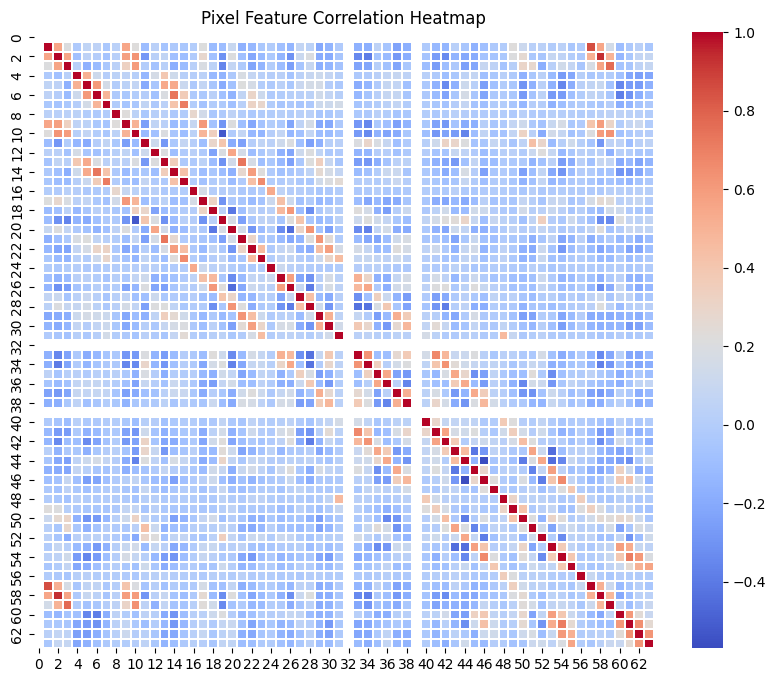

In [15]:
plt.figure(figsize=(10, 8))
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.1)
plt.title("Pixel Feature Correlation Heatmap")
plt.show()

4. Processing confusion matrix

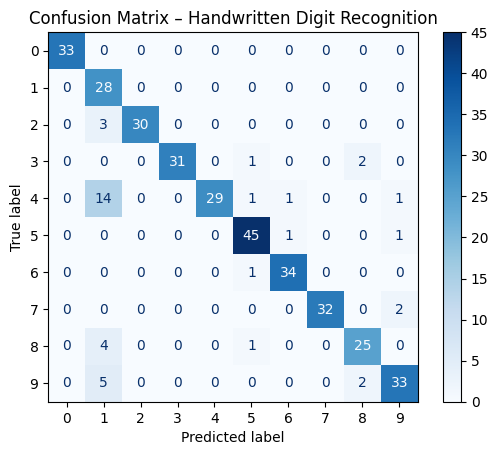

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Handwritten Digit Recognition")
plt.show()

Processing the image to make it into a digital image of 8 * 8 size

In [17]:
def preprocess_image(img: Image.Image) -> np.ndarray:
    img = img.convert("L")
    img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)
    img_array = np.array(img_resized)
    img_array = 255 - img_array
    img_scaled = (img_array / 255.0) * 16
    return img_scaled.flatten().reshape(1, -1)



Predicting the digit of the handWritten image.

In [18]:
def predict_digit_from_image(image: Image.Image):
    try:
        processed = preprocess_image(image)

        img = image.convert("L").resize((8, 8), Image.Resampling.LANCZOS)
        img_array = 255 - np.array(img)
        plt.figure(figsize=(2, 2))
        plt.imshow(img_array, cmap="gray")
        plt.title("Preprocessed 8x8 Input")
        plt.axis("off")
        plt.show()

        prediction = model.predict(processed)[0]
        return f"Predicted Digit: {prediction}", int(prediction)
    except Exception as e:
        return f"Error: {e}", -1



Keeping the flag data for further impovement of the model

In [19]:
class CustomFlagger(gr.FlaggingCallback):
    def __init__(self, dir_path="flagged"):
        ...

    def setup(self, components, flagging_dir):
        self.components = components

    def flag(self, flag_data, flag_reason, flagging_dir=None):
      img, prediction_text, prediction_number = flag_data  # unpack all three
      img_path = os.path.join(self.dir_path, f"flagged_{len(os.listdir(self.dir_path))}.png")
      img.save(img_path)

      with open(self.csv_path, mode="a", newline="") as f:
          writer = csv.writer(f)
          writer.writerow([img_path, prediction_text, prediction_number, flag_reason])

      print(f"Flag saved: {img_path} – {prediction_text}")
      return



Creating an user-friendly web-based interface using Gradio.

In [20]:
interface = gr.Interface(
    fn=predict_digit_from_image,
    inputs=gr.Image(type="pil", label="Upload Handwritten Digit (8x8 style)"),
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Number(label="Digit (for flagging)")
    ],
    title="🖊️ Handwritten Digit Recognizer",
    description="Upload a handwritten digit image (digit should be black on white).",
    flagging_callback=CustomFlagger()
)

Lauching the interface.

In [21]:
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2b8dec7443b2468e41.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
